# Module 6 : Performance measurements of Naive Bayes

In [1]:
#import library packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load given dataset
data = pd.read_csv("data.csv")

In [4]:
df = data.dropna()

In [5]:
df.columns

Index(['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor',
       'web_traffic', 'URL_Length', 'age_of_domain', 'having_IP_Address',
       'Result'],
      dtype='object')

In [6]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [7]:
X = df.drop(labels='Result', axis=1)
#Response variable
y = df.loc[:,'Result'] 

In [8]:
#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Naive Bayes:

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

nb = GaussianNB()

nb.fit(X_train,y_train)

predictR = nb.predict(X_test)

print("")
print('Classification report of Naive Bayes Results:')
print("")
print(classification_report(y_test,predictR))

print("")
cm=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Naive Bayes is:\n',cm)
print("")
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )
print("")
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
print("")

accuracy = cross_val_score(nb, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
#get the mean of each fold 
print("")
print("Accuracy result of Naive Bayes is:",accuracy.mean() * 100)
LR=accuracy.mean() * 100


Classification report of Naive Bayes Results:

              precision    recall  f1-score   support

          -1       0.83      0.88      0.85       211
           0       0.36      0.16      0.22        31
           1       0.79      0.80      0.80       164

    accuracy                           0.80       406
   macro avg       0.66      0.62      0.62       406
weighted avg       0.78      0.80      0.78       406


Confusion Matrix result of Naive Bayes is:
 [[186   3  22]
 [ 13   5  13]
 [ 26   6 132]]

Sensitivity :  0.9841269841269841

Specificity :  0.2777777777777778

Cross validation test results of accuracy:
[0.79335793 0.80811808 0.83763838 0.82592593 0.82592593]

Accuracy result of Naive Bayes is: 81.81932485991527


In [10]:
def graph():
    import matplotlib.pyplot as plt
    data=[LR]
    alg="GaussianNB"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("b"))
    plt.title("Accuracy comparison of Heart Stroke",fontsize=15)
    plt.legend(b,data,fontsize=9)

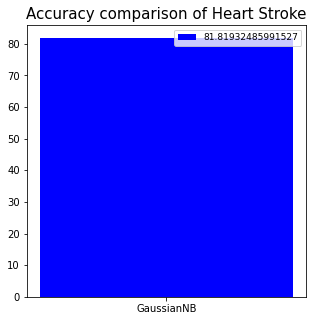

In [11]:
graph()

In [12]:
TP = cm[0][0]
FP = cm[1][0]
FN = cm[1][1]
TN = cm[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 186
True Negative : 3
False Positive : 13
False Negative : 5

True Positive Rate : 0.9738219895287958
True Negative Rate : 0.1875
False Positive Rate : 0.8125
False Negative Rate : 0.02617801047120419

Positive Predictive Value : 0.9346733668341709
Negative predictive value : 0.375


Confusion matrix-Naive Bayes:
[[186   3  22]
 [ 13   5  13]
 [ 26   6 132]]


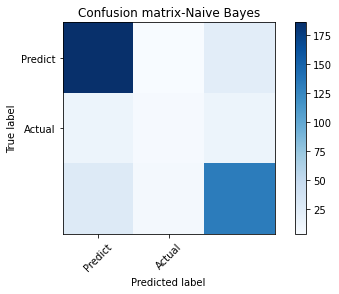

In [13]:
def plot_confusion_matrix(cm2, title='Confusion matrix-Naive Bayes', cmap=plt.cm.Blues):
    target_names=['Predict','Actual']
    plt.imshow(cm2, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm2=confusion_matrix(y_test, predictR)
print('Confusion matrix-Naive Bayes:')
print(cm2)
plot_confusion_matrix(cm2)